In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv("/content/data.csv")

In [25]:
df.head(5)

,Nose,Neck,RShoulder,RElbow,RWrist,LShoulder,LElbow,LWrist,MidHip,RHip,RKnee,RAnkle,LHip,LKnee,LAnkle,REye,LEye,REar,LEar,LBigToe,LSmallToe,LHeel,RBigToe,RSmallToe,RHeel,Background,tag
0,"821.322,290.387","731.299,272.79","664.603,245.435","607.855,415.796","568.652,578.466","805.649,298.3","789.999,431.512","786.139,570.525","590.219,337.509","531.415,333.524","627.398,468.761","574.535,715.594","648.952,355.097","713.577,480.54","682.284,694.05","819.383,272.704","837.044,276.711","778.248,210.107","0.0,0.0","748.904,699.939","746.935,697.945","666.633,699.966","0.0,0.0","0.0,0.0","0.0,0.0",0,1
1,"819.352,292.408","731.286,272.849","664.586,247.356","607.833,415.796","566.716,582.347","805.691,298.266","790.006,431.52","786.115,568.655","590.209,337.465","531.414,331.575","629.406,462.801","576.488,715.6","647.032,353.171","713.555,482.469","682.278,694.004","813.571,272.817","836.974,282.606","778.335,212.059","0.0,0.0","748.88,699.99","745.011,697.965","666.639,699.92","603.878,715.612","0.0,0.0","588.252,715.643",0,1
2,"821.349,298.305","733.238,274.824","666.551,253.218","605.916,413.834","566.686,584.287","807.619,304.199","790.039,431.612","786.076,570.534","588.279,337.428","531.398,327.69","631.316,458.94","576.516,715.595","648.938,353.147","711.742,482.462","682.289,694.002","819.368,276.7","837.053,288.447","778.349,216.015","0.0,0.0","748.891,699.988","746.912,697.963","666.659,699.914","0.0,0.0","0.0,0.0","0.0,0.0",0,1
3,"821.34,304.165","733.226,274.847","666.568,255.201","603.999,415.824","566.7,584.345","805.686,300.261","790.115,431.488","786.103,570.595","590.188,337.469","533.381,327.666","629.392,460.838","576.505,715.596","648.971,355.087","713.549,482.461","682.294,694.03","819.411,286.505","836.987,290.506","782.187,223.833","0.0,0.0","750.856,699.934","746.956,697.961","666.659,699.945","0.0,0.0","0.0,0.0","0.0,0.0",0,1
4,"823.307,306.129","735.18,274.822","666.611,255.195","605.885,413.879","568.589,584.344","807.617,296.349","791.953,431.594","788.015,570.616","588.243,335.557","531.439,325.727","631.348,458.955","578.455,715.587","647.002,353.181","713.555,482.451","682.274,695.909","821.396,288.464","838.977,292.447","786.13,225.75","0.0,0.0","748.87,699.953","745.007,697.954","666.64,699.987","0.0,0.0","0.0,0.0","0.0,0.0",0,1


In [0]:
df = df.drop(['Background'], axis=1)

In [27]:
df.dtypes

Nose         object
Neck         object
RShoulder    object
RElbow       object
RWrist       object
LShoulder    object
LElbow       object
LWrist       object
MidHip       object
RHip         object
RKnee        object
RAnkle       object
LHip         object
LKnee        object
LAnkle       object
REye         object
LEye         object
REar         object
LEar         object
LBigToe      object
LSmallToe    object
LHeel        object
RBigToe      object
RSmallToe    object
RHeel        object
tag           int64
dtype: object

In [28]:
desired_columns = [column for column in df.columns if column != "tag"]
df[desired_columns].head(1)

,Nose,Neck,RShoulder,RElbow,RWrist,LShoulder,LElbow,LWrist,MidHip,RHip,RKnee,RAnkle,LHip,LKnee,LAnkle,REye,LEye,REar,LEar,LBigToe,LSmallToe,LHeel,RBigToe,RSmallToe,RHeel
0,"821.322,290.387","731.299,272.79","664.603,245.435","607.855,415.796","568.652,578.466","805.649,298.3","789.999,431.512","786.139,570.525","590.219,337.509","531.415,333.524","627.398,468.761","574.535,715.594","648.952,355.097","713.577,480.54","682.284,694.05","819.383,272.704","837.044,276.711","778.248,210.107","0.0,0.0","748.904,699.939","746.935,697.945","666.633,699.966","0.0,0.0","0.0,0.0","0.0,0.0"


In [29]:
for column in desired_columns:
    df[[column + "_x", column + "_y"]] = df[column].str.split(expand=True, pat=",")
    df = df.drop(column, axis=1)
df.head()

,tag,Nose_x,Nose_y,Neck_x,Neck_y,RShoulder_x,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,RWrist_y,LShoulder_x,LShoulder_y,LElbow_x,LElbow_y,LWrist_x,LWrist_y,MidHip_x,MidHip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,RAnkle_x,RAnkle_y,LHip_x,LHip_y,LKnee_x,LKnee_y,LAnkle_x,LAnkle_y,REye_x,REye_y,LEye_x,LEye_y,REar_x,REar_y,LEar_x,LEar_y,LBigToe_x,LBigToe_y,LSmallToe_x,LSmallToe_y,LHeel_x,LHeel_y,RBigToe_x,RBigToe_y,RSmallToe_x,RSmallToe_y,RHeel_x,RHeel_y
0,1,821.322,290.387,731.299,272.79,664.603,245.435,607.855,415.796,568.652,578.466,805.649,298.3,789.999,431.512,786.139,570.525,590.219,337.509,531.415,333.524,627.398,468.761,574.535,715.594,648.952,355.097,713.577,480.54,682.284,694.05,819.383,272.704,837.044,276.711,778.248,210.107,0.0,0.0,748.904,699.939,746.935,697.945,666.633,699.966,0.0,0.0,0.0,0.0,0.0,0.0
1,1,819.352,292.408,731.286,272.849,664.586,247.356,607.833,415.796,566.716,582.347,805.691,298.266,790.006,431.52,786.115,568.655,590.209,337.465,531.414,331.575,629.406,462.801,576.488,715.6,647.032,353.171,713.555,482.469,682.278,694.004,813.571,272.817,836.974,282.606,778.335,212.059,0.0,0.0,748.88,699.99,745.011,697.965,666.639,699.92,603.878,715.612,0.0,0.0,588.252,715.643
2,1,821.349,298.305,733.238,274.824,666.551,253.218,605.916,413.834,566.686,584.287,807.619,304.199,790.039,431.612,786.076,570.534,588.279,337.428,531.398,327.69,631.316,458.94,576.516,715.595,648.938,353.147,711.742,482.462,682.289,694.002,819.368,276.7,837.053,288.447,778.349,216.015,0.0,0.0,748.891,699.988,746.912,697.963,666.659,699.914,0.0,0.0,0.0,0.0,0.0,0.0
3,1,821.34,304.165,733.226,274.847,666.568,255.201,603.999,415.824,566.7,584.345,805.686,300.261,790.115,431.488,786.103,570.595,590.188,337.469,533.381,327.666,629.392,460.838,576.505,715.596,648.971,355.087,713.549,482.461,682.294,694.03,819.411,286.505,836.987,290.506,782.187,223.833,0.0,0.0,750.856,699.934,746.956,697.961,666.659,699.945,0.0,0.0,0.0,0.0,0.0,0.0
4,1,823.307,306.129,735.18,274.822,666.611,255.195,605.885,413.879,568.589,584.344,807.617,296.349,791.953,431.594,788.015,570.616,588.243,335.557,531.439,325.727,631.348,458.955,578.455,715.587,647.002,353.181,713.555,482.451,682.274,695.909,821.396,288.464,838.977,292.447,786.13,225.75,0.0,0.0,748.87,699.953,745.007,697.954,666.64,699.987,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
len(df.columns)

51

In [31]:
df2 = df.copy()
df2 = df2.astype("float64")
df2.describe()

,tag,Nose_x,Nose_y,Neck_x,Neck_y,RShoulder_x,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,RWrist_y,LShoulder_x,LShoulder_y,LElbow_x,LElbow_y,LWrist_x,LWrist_y,MidHip_x,MidHip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,RAnkle_x,RAnkle_y,LHip_x,LHip_y,LKnee_x,LKnee_y,LAnkle_x,LAnkle_y,REye_x,REye_y,LEye_x,LEye_y,REar_x,REar_y,LEar_x,LEar_y,LBigToe_x,LBigToe_y,LSmallToe_x,LSmallToe_y,LHeel_x,LHeel_y,RBigToe_x,RBigToe_y,RSmallToe_x,RSmallToe_y,RHeel_x,RHeel_y
count,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.00000
mean,0.756782,610.414114,216.872028,671.302357,252.725846,637.207879,254.583855,590.076837,348.403292,559.628818,423.076823,702.378139,250.938157,652.089510,327.776084,616.531826,384.082740,655.525105,362.194237,623.974775,358.039002,600.652413,454.704822,535.714766,526.575344,675.038367,360.886665,653.693997,462.775375,556.504763,495.588858,540.467030,173.649567,489.515959,159.823983,385.271473,113.771785,367.635897,114.812227,436.107080,390.173787,402.365657,352.707157,513.461098,463.106273,424.534816,421.792039,390.171775,389.389731,492.757299,481.28277
std,0.429048,290.267149,127.548173,201.419862,83.443011,207.078941,83.522127,243.844348,117.588973,263.600593,176.564166,208.679353,86.734499,298.139155,143.582718,335.135674,208.581021,218.630204,63.943533,224.522705,73.265279,231.337934,128.043767,289.467261,240.431999,230.304664,70.409851,233.471469,124.706658,320.221622,253.495481,338.609125,131.691694,349.662510,134.504010,379.921323,128.384002,371.365313,129.822607,368.789573,312.287859,377.670245,315.933828,342.382157,281.245082,338.744957,309.999708,342.430328,316.497235,321.193662,277.16057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,478.496000,102.375000,558.914000,194.474000,511.846000,198.423000,504.015000,288.456000,492.291000,337.511000,588.341000,190.521000,541.166000,261.071000,494.125000,286.511000,560.849000,323.789000,525.539000,323.774000,539.268000,431.567000,445.191000,478.563000,549.053000,323.753000,552.950000,431.521000,402.158000,458.881000,415.834000,24.103100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,257.182000,400.18100
50%,1.000000,596.109000,247.317000,637.203000,259.199000,615.646000,264.995000,572.628000,380.586000,556.940000,490.277000,684.282000,255.162000,729.297000,368.766000,742.930000,449.201000,664.641000,360.986000,621.581000,360.963000,605.897000,474.613000,599.975000,625.491000,709.733000,362.943000,697.890000,476.554000,682.219000,603.917000,570.512000,204.267000,539.319000,172.884000,431.453000,51.407900,464.811000,53.317500,570.539000,584.312000,490.277000,484.430000,668.552000,603.937000,541.189000,625.490000,515.723000,592.144000,598.047000,631.30100
75%,1.000000,825.315000,313.925000,756.740000,304.204000,733.214000,306.067000,703.827000,431.477000,682.382000,545.162000,809.657000,306.151000,807.577000,429.574000,805.740000,541.179000,719.489000,398.215000,672.490000,398.225000,684.246000,517.700000,670.489000,686.

In [0]:
desired_columns = [column for column in df.columns if column != "tag"]
X=df[desired_columns].values
y=df["tag"].values

In [33]:
X = X.astype('float64')
y = y.astype('int64')
y = y.reshape(-1, 1)
print(X.dtype, X.shape)
print(y.dtype, y.shape)

float64 (9473, 50)
int64 (9473, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (7578, 50) (7578, 1)
Test (1895, 50) (1895, 1)


In [0]:
from sklearn.preprocessing import StandardScaler

def standardScaling(feature):
    scaler = StandardScaler().fit(feature)
    scaled_feature = scaler.transform(feature)
    scaled_feat = pd.DataFrame(data=scaled_feature)
    return scaled_feature

X_train_scaled = standardScaling(X_train)
X_test_scaled = standardScaling(X_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

y_train = y_train.reshape(-1, 1).squeeze()
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0, warm_start=False)


rf_prediction = rf_model.predict(X_test_scaled)

print('Classification Report: \n')
print(classification_report(y_test, rf_prediction))
print('\nConfusion_matrix: \n')
print(confusion_matrix(y_test, rf_prediction))

Classification Report: 

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       480
           1       0.98      0.99      0.99      1415

    accuracy                           0.98      1895
   macro avg       0.97      0.97      0.97      1895
weighted avg       0.98      0.98      0.98      1895


Confusion_matrix: 

[[ 456   24]
 [  18 1397]]


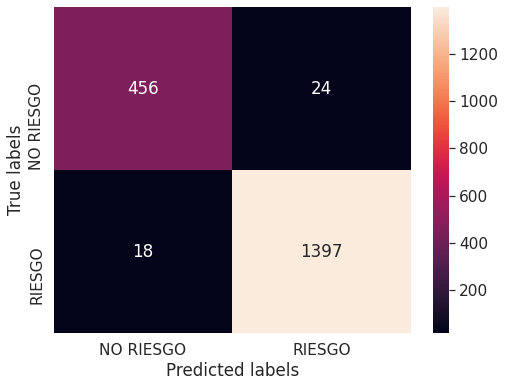

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(8, 6))
ax= plt.subplot()

sns.set(font_scale=1.4) # for label size

LABELS = ["NO RIESGO", "RIESGO"]
sns.heatmap(confusion_matrix(y_test, rf_prediction), ax=ax, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.savefig('confusion matrix.png')
plt.show()

In [40]:
import joblib
filename = 'model.sav'
joblib.dump(rf_model, filename)

['model.sav']

In [0]:
loaded_model = joblib.load(filename)